## Fake News Detection

#### Importing necessary library

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from tensorflow.keras.preprocessing.text import one_hot

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

#### Read training dataset

In [2]:
df=pd.read_csv('fake-news/train.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.shape

(20800, 5)

#### checking null values

In [5]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

#### droping null values

In [6]:
df=df.dropna()

In [7]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [118]:
df.groupby('label').count()

,index,id,title,author,text
label,,,,,
0,10361,10361,10361,10361,10361
1,7924,7924,7924,7924,7924


In [8]:
df.shape

(18285, 5)

#### Resetting index of the dataset 

In [9]:
#resetting index
df.reset_index(inplace=True)

In [10]:
df.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


#### Creating dependent and independent features

In [11]:

X=df.drop(['label'], axis=1)
y=df['label']

In [12]:
print(X.shape , y.shape)

(18285, 5) (18285,)


#### Taking vocabulary size of 5000

In [13]:
voc_size=5000

In [14]:
messages=X.copy()

In [15]:
messages.shape

(18285, 5)

In [19]:
messages['title'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

#### Data Preprocessing of title column

In [17]:

ps=PorterStemmer() #creatng porterstemmer
corpus= []

for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]',' ', messages['title'][i]) #removing special characters
    review = review.lower() #converting letters to lower case
    review = review.split()
   
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')] #removing stopwords
    review = ' '.join(review)
    corpus.append(review) 

In [20]:
corpus[1]

'flynn hillari clinton big woman campu breitbart'

#### Onehot Representation

In [21]:
onehot_rep=[one_hot(words,voc_size) for words in corpus]

In [22]:
onehot_rep[1]

[3169, 4584, 4542, 3625, 2482, 40, 2114]

#### Embedding Representation

In [23]:
sent_length = 20
embedded_docs=pad_sequences(onehot_rep, padding='pre', maxlen=sent_length)

In [24]:
embedded_docs

array([[   0,    0,    0, ..., 4282,  676, 1079],
       [   0,    0,    0, ..., 2482,   40, 2114],
       [   0,    0,    0, ..., 4591, 2447, 2509],
       ...,
       [   0,    0,    0, ..., 3156, 1340, 2007],
       [   0,    0,    0, ..., 4958,  270, 3357],
       [   0,    0,    0, ...,  242, 4218, 2610]])

In [25]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 2445,
       4584, 4613, 3870, 4620, 4721, 2164, 4282,  676, 1079])

In [26]:
len(embedded_docs[0])

20

#### Train test split

In [27]:
len(embedded_docs),y.shape

(18285, (18285,))

In [28]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [29]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

#### Creating LSTM model

In [31]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


#### Training the model

In [32]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, batch_size=60)

Epoch 1/10
205/205 [==============================] - 5s 15ms/step - loss: 0.3229 - accuracy: 0.8510 - val_loss: 0.1940 - val_accuracy: 0.9200
Epoch 2/10
205/205 [==============================] - 3s 14ms/step - loss: 0.1389 - accuracy: 0.9470 - val_loss: 0.2040 - val_accuracy: 0.9198
Epoch 3/10
205/205 [==============================] - 3s 13ms/step - loss: 0.0907 - accuracy: 0.9668 - val_loss: 0.2587 - val_accuracy: 0.9201
Epoch 4/10
205/205 [==============================] - 3s 13ms/step - loss: 0.0595 - accuracy: 0.9790 - val_loss: 0.2758 - val_accuracy: 0.9118
Epoch 5/10
205/205 [==============================] - 3s 13ms/step - loss: 0.0386 - accuracy: 0.9880 - val_loss: 0.3103 - val_accuracy: 0.9080
Epoch 6/10
205/205 [==============================] - 3s 13ms/step - loss: 0.0201 - accuracy: 0.9942 - val_loss: 0.3814 - val_accuracy: 0.9132
Epoch 7/10
205/205 [==============================] - 3s 13ms/step - loss: 0.0108 - accuracy: 0.9963 - val_loss: 0.4940 - val_accuracy: 0.9162

#### Performance Metrics And Accuracy

In [33]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

189/189 [==============================] - 1s 3ms/step


In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
print(confusion_matrix(y_test,predictions))

[[3147  272]
 [ 294 2322]]


In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      3419
           1       0.90      0.89      0.89      2616

    accuracy                           0.91      6035
   macro avg       0.90      0.90      0.90      6035
weighted avg       0.91      0.91      0.91      6035



In [37]:
accuracy_score(y_test,predictions)

0.9062137531068766

#### Adding Dropout

In [38]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            200000    
                                                                 
 dropout (Dropout)           (None, 20, 40)            0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               56400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [40]:
history=model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, batch_size=60)

Epoch 1/10
205/205 [==============================] - 4s 15ms/step - loss: 0.3337 - accuracy: 0.8399 - val_loss: 0.1918 - val_accuracy: 0.9193
Epoch 2/10
205/205 [==============================] - 3s 13ms/step - loss: 0.1486 - accuracy: 0.9414 - val_loss: 0.1916 - val_accuracy: 0.9168
Epoch 3/10
205/205 [==============================] - 3s 13ms/step - loss: 0.0981 - accuracy: 0.9633 - val_loss: 0.1995 - val_accuracy: 0.9186
Epoch 4/10
205/205 [==============================] - 3s 13ms/step - loss: 0.0698 - accuracy: 0.9748 - val_loss: 0.2476 - val_accuracy: 0.9186
Epoch 5/10
205/205 [==============================] - 3s 14ms/step - loss: 0.0488 - accuracy: 0.9840 - val_loss: 0.2766 - val_accuracy: 0.9059
Epoch 6/10
205/205 [==============================] - 3s 13ms/step - loss: 0.0325 - accuracy: 0.9900 - val_loss: 0.3720 - val_accuracy: 0.9193
Epoch 7/10
205/205 [==============================] - 3s 13ms/step - loss: 0.0216 - accuracy: 0.9930 - val_loss: 0.3989 - val_accuracy: 0.9163

In [41]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

189/189 [==============================] - 1s 3ms/step


In [42]:
accuracy_score(y_test,predictions)

0.9123446561723281

[[3149  270]
 [ 259 2357]]


<AxesSubplot:>

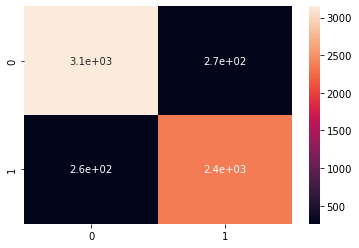

In [43]:
import seaborn as sns
cf=confusion_matrix(y_test,predictions)
print(cf)
sns.heatmap(cf,annot=True)

In [44]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3419
           1       0.90      0.90      0.90      2616

    accuracy                           0.91      6035
   macro avg       0.91      0.91      0.91      6035
weighted avg       0.91      0.91      0.91      6035



In [45]:
accuracy_score(y_test,predictions)

0.9123446561723281

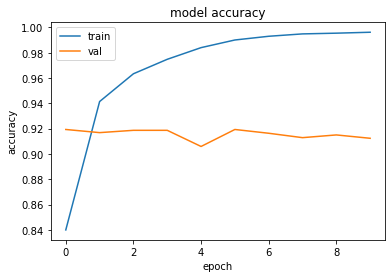

In [46]:
import keras
from matplotlib import pyplot as plt
#history = model.fit(X_train, y_train,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

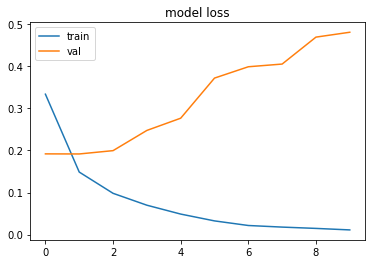

In [47]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title('model loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### Prediction with Test Dataset

In [48]:
df_test=pd.read_csv('fake-news/test.csv')

In [49]:
df_test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [50]:
df_test.shape

(5200, 4)

In [51]:
df_test.isna().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [52]:
df_test.dropna(inplace=True)

In [53]:
df_test.shape

(4575, 4)

In [55]:
df_test.reset_index(inplace=True)

In [56]:
df_test.head(10)

,index,id,title,author,text
0,0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
2,3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
3,4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
4,6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori..."
5,7,20807,Weekly Featured Profile – Randy Shannon,Trevor Loudon,You are here: Home / *Articles of the Bound* /...
6,10,20810,184 U.S. generals and admirals endorse Trump f...,Dr. Eowyn,Have you seen that pro-Hillary TV ad of disgra...
7,11,20811,“Working Class Hero” by John Brennon,Doug Diamond,"Source: CNBC, article by Robert Ferris Arctic ..."
8,12,20812,The Rise of Mandatory Vaccinations Means the E...,Shaun Bradley,Written by Shaun Bradley Mandatory vaccinati...
9,13,20813,Communists Terrorize Small Business,Steve Watson,Store Communists Terrorize Small Business The ...


In [57]:
len(df_test)

4575

In [59]:
lines_test = []
for i in df_test.title:
    words=""
    q=i.lower()
    q=re.sub('[^a-zA-Z]', ' ',q)
    q=q.split()
    
    for j in q:
        if(j not in stopwords.words('english')):
            words=words +" "+j
    lines_test.append(words)

In [60]:
lines_test[0]

' specter trump loosens tongues purse strings silicon valley new york times'

In [61]:
onehot_repr_test=[one_hot(words,voc_size)for words in lines_test] 
onehot_repr_test

[[1664, 305, 3532, 2408, 4426, 86, 2697, 3501, 3156, 1340, 1253],
 [3114, 642, 1319, 968, 279, 140, 2959, 4702, 2224, 4540],
 [4005, 1531, 2566, 3298, 691, 2007, 467, 3156, 1340, 1253],
 [1356, 2933, 1796, 1528, 933],
 [2987, 3833, 3938, 523, 2456, 1845, 847, 305, 2114],
 [166, 21, 681, 2823, 2237],
 [2941, 2464, 899, 4981, 305, 4453, 4661],
 [1703, 404, 3833, 4862, 741],
 [447, 2099, 3209, 409, 3670, 2570, 1680],
 [937, 1047, 3268, 2806],
 [2887, 3566, 2864, 3443, 2461, 4547, 2693, 1431, 2241, 305, 550, 373, 1549],
 [1522, 3361, 2577, 2162, 508, 3975, 2692, 3156, 1340, 1253],
 [3156,
  2926,
  3666,
  4991,
  3865,
  2425,
  4070,
  4218,
  4925,
  265,
  2651,
  3156,
  1340,
  1253],
 [2779, 4087, 926, 1063, 2811, 3496, 1716, 4828, 2114],
 [305, 452, 1124, 4124, 3328, 4958, 1636, 527, 4542],
 [1100, 915, 4441, 3272, 2835, 2954, 3015, 4172, 3156, 1340, 1253],
 [1037, 1136, 3421, 4819, 2435, 2975, 3134, 3484],
 [3934, 1189, 3934, 2218, 847, 305, 256, 737, 343],
 [3008, 604, 76, 305, 1

In [62]:
sent_length=20
embedded_docs_test=pad_sequences(onehot_repr_test,padding='pre',maxlen=sent_length)
print(embedded_docs_test)

[[   0    0    0 ... 3156 1340 1253]
 [   0    0    0 ... 4702 2224 4540]
 [   0    0    0 ... 3156 1340 1253]
 ...
 [   0    0    0 ... 3156 1340 1253]
 [   0    0    0 ... 3156 1340 1253]
 [   0    0    0 ... 3156 1340 1253]]


In [85]:
test_pred = (model.predict(embedded_docs_test) > 0.5).astype("int32")

143/143 [==============================] - 1s 4ms/step


In [88]:
test_pred

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [86]:
test_pred1 = []
for i in test_pred:
    if i>0.5:
        test_pred1.append(1)
    else:
        test_pred1.append(0)

In [90]:
test_pred1[2]

0

In [91]:
type(tes)

list

#### Creating Dataframe for submission.csv

In [92]:
df_test.head()

,index,id,title,author,text
0,0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
2,3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
3,4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
4,6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori..."


In [93]:
df_test.shape

(4575, 5)

In [94]:
idx=list(df_test['id'])

In [95]:
len(idx)

4575

In [96]:
type(idx)

list

In [113]:
#idx = list(df_test['id'])
#titlex=list(df_test['title'])
df_sub = pd.DataFrame({'id':idx, 'label':test_pred1})

In [114]:
df_sub.head()

,id,label
0,20800,0
1,20802,1
2,20803,0
3,20804,1
4,20806,0


In [115]:
df_sub.groupby('label').count()

,id
label,
0,2409
1,2166


<AxesSubplot:xlabel='label'>

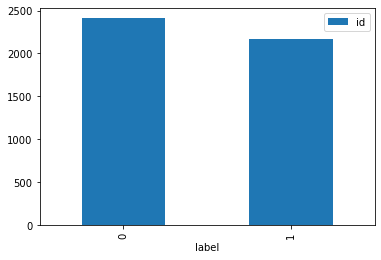

In [116]:
df_sub.groupby('label').count().plot(kind='bar')

#### Saving submissions to csv

In [112]:
df_sub.to_csv('submission.csv', index=False)